In [1]:
import numpy as np
import pygimli as pg
import pybert as pb
from pygimli.viewer.mpl import drawMeshBoundaries

In [2]:
self = pb.FDIP("synthSlag")
print(self)

SIP data: nf=14 nc=0 nv=61 Data: Electrodes: 40 data: 728
SIP data: nf=14 nc=0 nv=61 Data: Electrodes: 40 data: 728


In [3]:
# Noisify the data
relError = 0.03
self.RHOA *= (1 + np.random.randn(*self.RHOA.shape)*relError)
self.data["err"] = pg.Vector(self.data.size(), relError)

In [4]:
meshkw = dict(paraDepth=10, quality=34.5, paraDX=0.25)
self.simultaneousInversion(meshkw=meshkw, zWeight=0.3)

15/07/22 - 14:19:57 - pyGIMLi - INFO - Found 2 regions.
15/07/22 - 14:19:57 - pyGIMLi - INFO - Region with smallest marker (1) set to background
15/07/22 - 14:19:57 - pyGIMLi - INFO - Found 2 regions.
15/07/22 - 14:19:57 - pyGIMLi - INFO - Region with smallest marker (1) set to background
15/07/22 - 14:19:57 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/07/22 - 14:19:57 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/07/22 - 14:19:57 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/07/22 - 14:19:57 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/07/22 - 14:19:59 - pyGIMLi - INFO - Starting model set from given array. 15722 [110.62169095575771,...,110.62169095575771]
15/07/22 - 14:19:59 - pyGIMLi - INFO - Starting model set from given array. 15722 [110.62169095575771,...,110.62169095575771]
15/07/22 - 14:19:59 - pyGIMLi - INFO - Starting inversion.
15/07/22 - 14:19:59 - pyGIMLi - INFO - Starting inversion.


1123 model cells
fop: <pygimli.frameworks.timelapse.MultiFrameModelling object at 0x000001C5E623A3B0>
Data transformation: <pygimli.core._pygimli_.RTrans object at 0x000001C5E6C0D280>
Model transformation: <pygimli.core._pygimli_.RTransLog object at 0x000001C5E6BCF1D0>
min/max (data): 53.23/347
min/max (error): 3%/3%
min/max (start model): 111/111
--------------------------------------------------------------------------------
1123 model cells
fop: <pygimli.frameworks.timelapse.MultiFrameModelling object at 0x000001C5E623A3B0>
Data transformation: <pygimli.core._pygimli_.RTrans object at 0x000001C5E6C0D280>
Model transformation: <pygimli.core._pygimli_.RTransLog object at 0x000001C5E6BCF1D0>
min/max (data): 53.23/347
min/max (error): 3%/3%
min/max (start model): 111/111
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... ------------------------------------------

15/07/22 - 14:22:47 - pyGIMLi - INFO - Starting model set from given array. 15722 [1.072095163065587,...,1.072095163065587]
15/07/22 - 14:22:47 - pyGIMLi - INFO - Starting model set from given array. 15722 [1.072095163065587,...,1.072095163065587]
15/07/22 - 14:22:47 - pyGIMLi - INFO - Starting inversion.
15/07/22 - 14:22:47 - pyGIMLi - INFO - Starting inversion.


chi² = 1.36 (dPhi = -0.07%) lam: 20.0
################################################################################
#                Abort criteria reached: dPhi = -0.07 (< 2.0%)                 #
################################################################################
fop: <pygimli.frameworks.modelling.LinearModelling object at 0x000001C5E6C19040>
Data transformation: <pygimli.core._pygimli_.RTrans object at 0x000001C5E6C0D280>
Model transformation: <pygimli.core._pygimli_.RTransLog object at 0x000001C5E6C19130>
min/max (data): 0.0035/42.02
min/max (error): 5.38%/1.0e+08%
min/max (start model): 1.07/1.07
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 1.36 (dPhi = -0.07%) lam: 20.0
################################################################################
#                Abort criteria reached: dPhi = -0.07 (< 2.0%)                 #

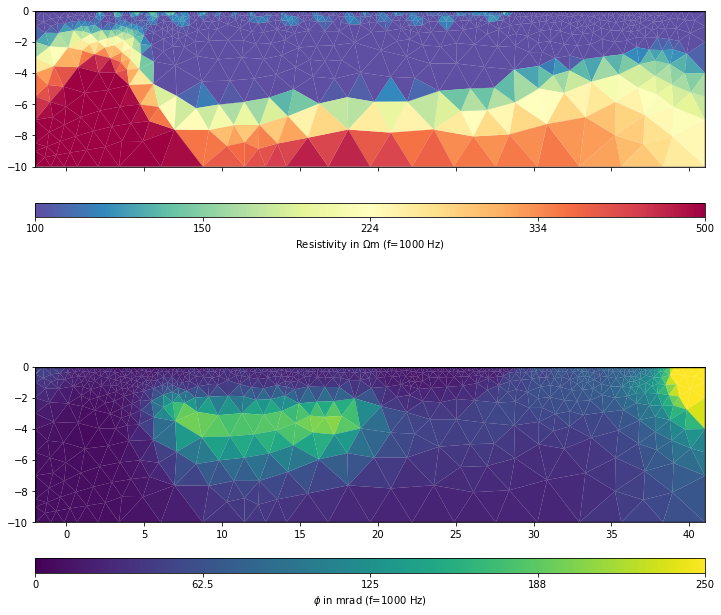

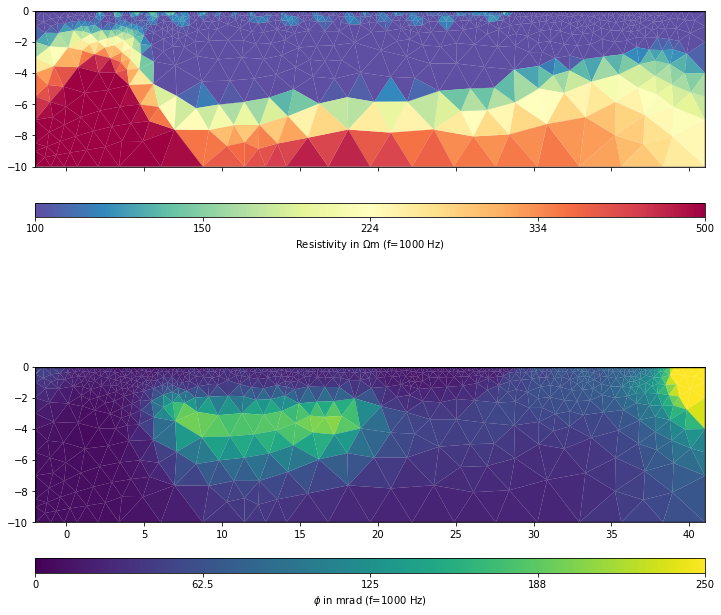

In [5]:
self.saveResults()
self.generateResultPDF(rmin=100, rmax=500, imax=250)

In [6]:
self.loadResults()

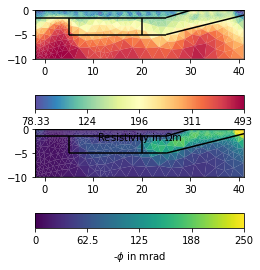

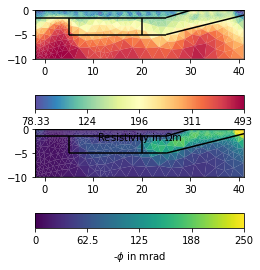

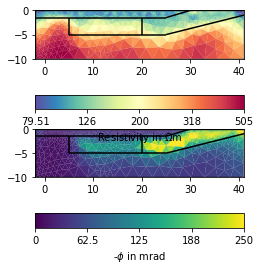

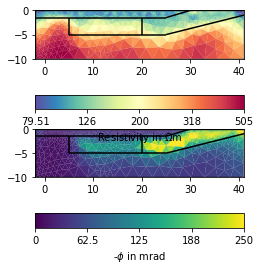

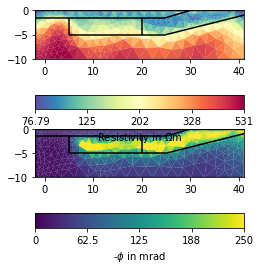

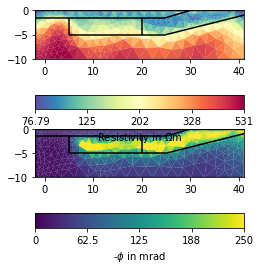

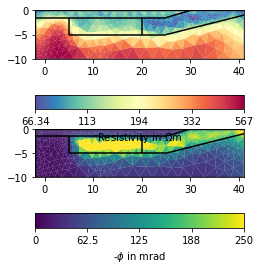

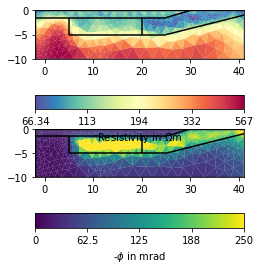

In [7]:
geo = pg.meshtools.readPLC("geo.poly")
for nr in [0, 2, 4, 6]:
    ax = self.showSingleResult(nr, imax=250)
    for a in ax:
        drawMeshBoundaries(a, geo, fitView=False)

24.803567666232333
24.803567666232333


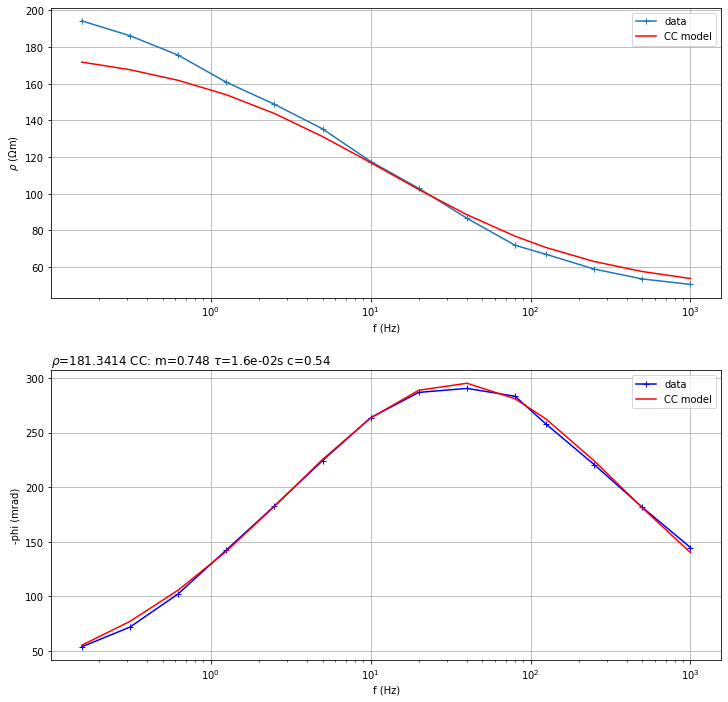

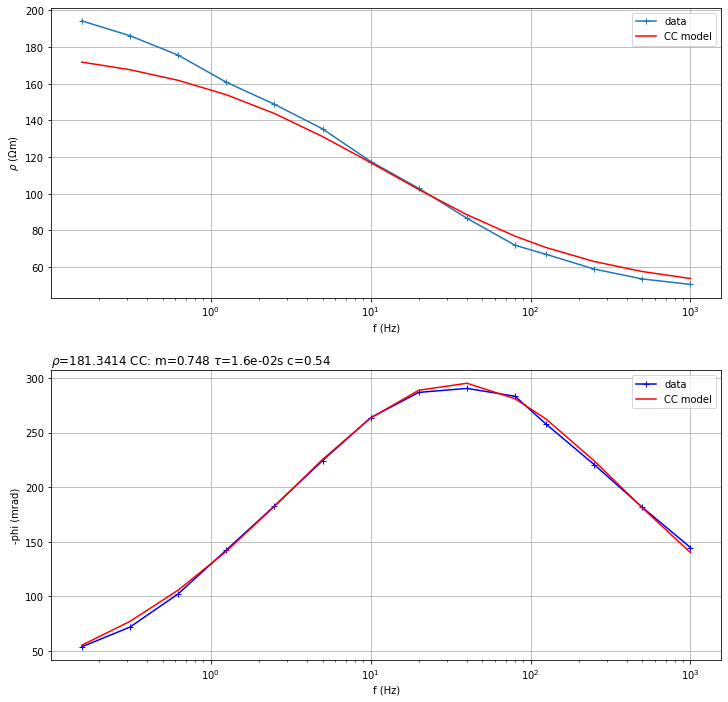

In [8]:
slag1 = self.getModelSpectrum([12.5, -3])
slag1.fitColeCole()
print(slag1.chi2)
slag1.showAll();

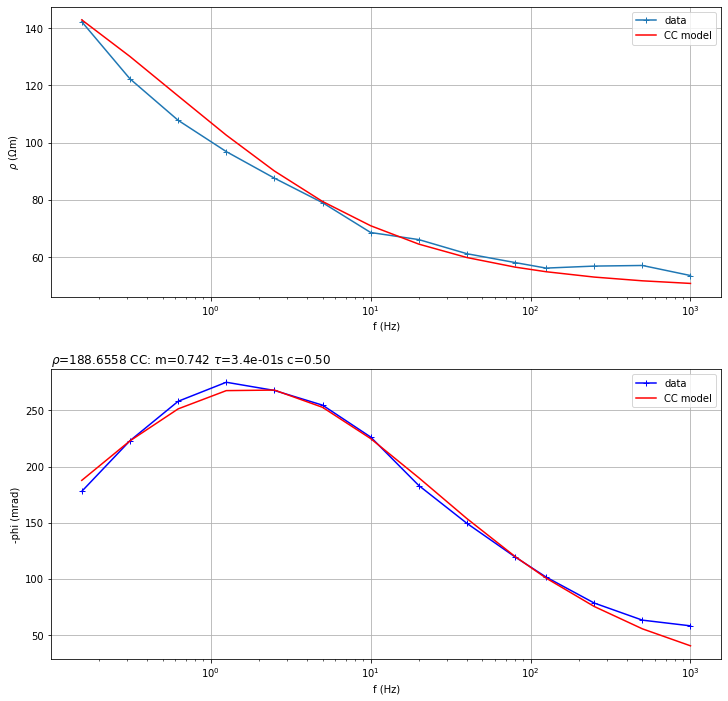

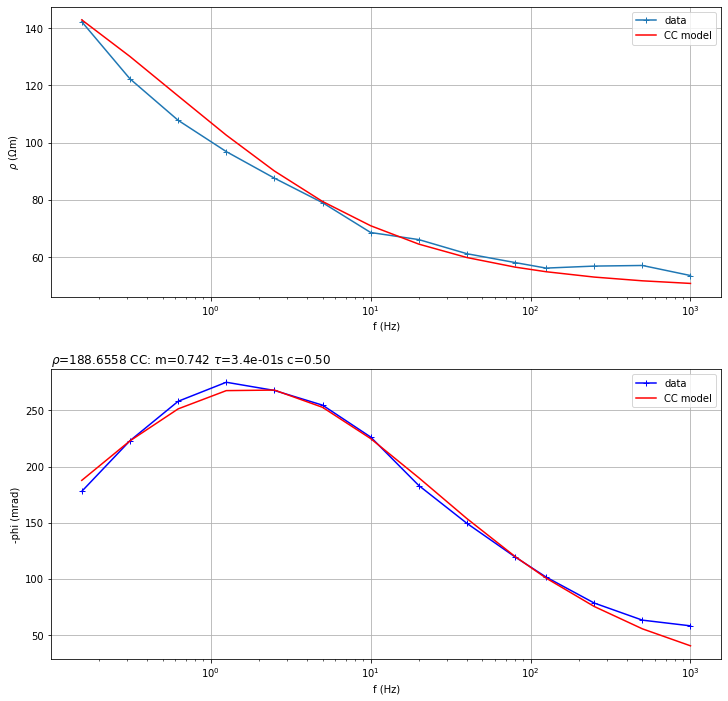

In [9]:
slag2 = self.getModelSpectrum([30, -1])
slag2.fitColeCole()
slag2.showAll();

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

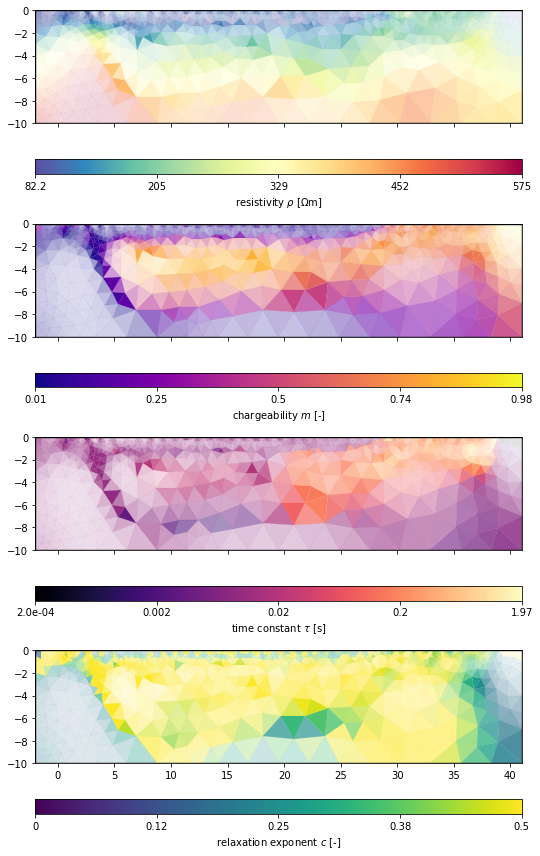

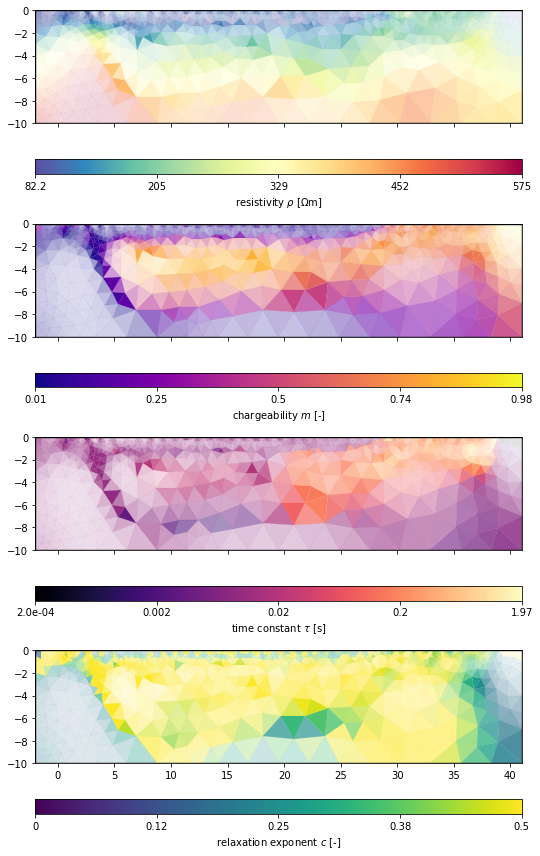

In [10]:
self.fitAllPhi()
self.showColeColeParameters()

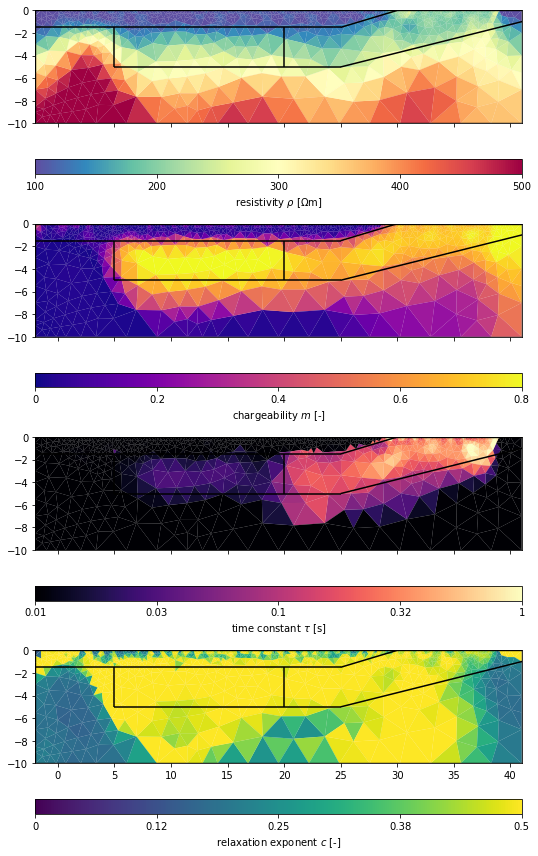

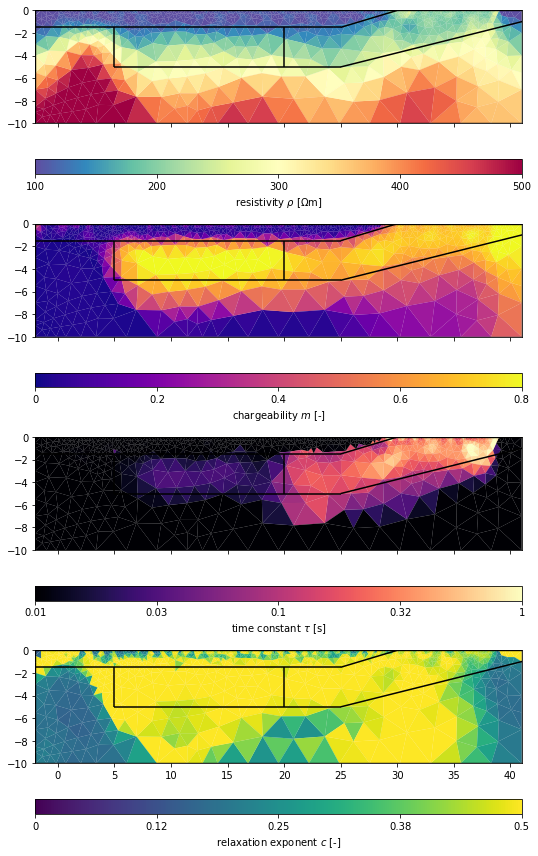

In [11]:
ax = self.showColeColeParameters(coverage=1, mlim=(0, 0.8),
                                 tlim=(0.01, 1), rlim=(100, 500))
for a in ax:
    drawMeshBoundaries(a, geo, fitView=False)